In [ ]:
include("CGS_POMDP.jl");
pomdp = CGSPOMDP();


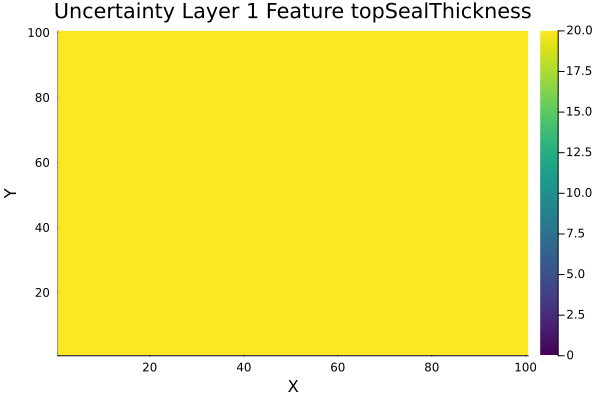

In [4]:
function visualize_uncertainty(pomdp::CGSPOMDP, layer::Int, column::Symbol)
    gridx = pcu([pt.vertices[1] for pt in domain(pomdp.state.earth[layer].gt)])
    ms = marginals(pomdp.belief[layer][column](gridx))
    mg_stds = std.(ms)
    stds_mtx = reshape(mg_stds, GRID_SIZE, GRID_SIZE)'

    heatmap(stds_mtx, color=:viridis, xlabel="X", ylabel="Y", title="Uncertainty Layer $layer Feature $column")
end

visualize_uncertainty(pomdp, 1, :topSealThickness)

In [ ]:
function visualize_gt(pomdp::CGSPOMDP, layer::Int)
    # df = copy(pomdp.state.earth[layer].df)
    # dom = domain(pomdp.state.earth[layer].gt)
    viewer(pomdp.state.earth[layer].gt)
    # var_map = georef(df, dom)
    # viewer(var_map)
end

### Test: Action function returns all actions

In [5]:
all_actions = POMDPs.actions(pomdp);

### Test: Observation function returns correct distributions

In [6]:
POMDPs.observation(pomdp, all_actions[2], pomdp.state)

Distributions.ProductDistribution{2, 1, Vector{FullNormal}, Distributions.Continuous, Float64}(
dists: FullNormal[FullNormal(
dim: 1
μ: [0.8845752922669021]
Σ: [0.09999988888739608;;]
)
, FullNormal(
dim: 1
μ: [89.62481020290505]
Σ: [0.09999900000912021;;]
)
, FullNormal(
dim: 1
μ: [44.046521576846494]
Σ: [0.09997500624842814;;]
)
, FullNormal(
dim: 1
μ: [619.0853810605295]
Σ: [0.09999988888739608;;]
)
, FullNormal(
dim: 1
μ: [43.1147362129401]
Σ: [0.09999900000912021;;]
)
, FullNormal(
dim: 1
μ: [71.40356377703031]
Σ: [0.09997500624842814;;]
)
, FullNormal(
dim: 1
μ: [1296.0803627991766]
Σ: [0.09999988888739608;;]
)
, FullNormal(
dim: 1
μ: [186.65311585423274]
Σ: [0.09999900000912021;;]
)
, FullNormal(
dim: 1
μ: [73.22265444965231]
Σ: [0.09997500624842814;;]
)
, FullNormal(
dim: 1
μ: [1651.5589173001977]
Σ: [0.09999988888739608;;]
)
, FullNormal(
dim: 1
μ: [93.93017059510606]
Σ: [0.09999900000912021;;]
)
, FullNormal(
dim: 1
μ: [36.394716024607014]
Σ: [0.09997500624842814;;]
)
, FullN

In [7]:
POMDPs.reward(pomdp, pomdp.state, all_actions[2])

  0.000000 seconds
action_cost -3
  0.189625 seconds (653.40 k allocations: 50.425 MiB, 44.45% gc time, 94.16% compilation time)
information_gain: 1.0
  5.965515 seconds (266.43 M allocations: 9.897 GiB, 10.09% gc time, 5.03% compilation time)
reward_suitability: 13795.700000004317


13793.700000004317

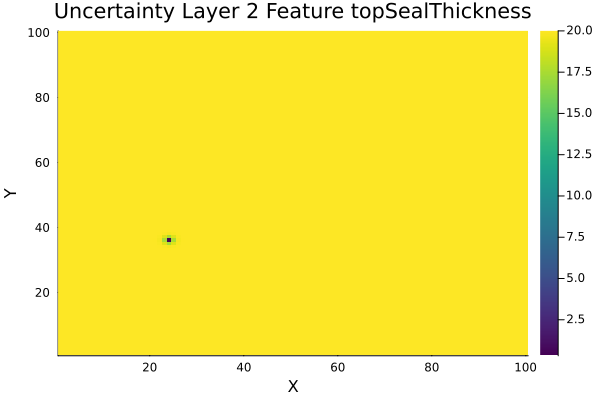

In [8]:
visualize_uncertainty(pomdp, 2, :topSealThickness)

In [8]:
POMDPs.observation(pomdp, all_actions[21], pomdp.state) # Can take up to 7 mins to run!

Distributions.ProductDistribution{2, 1, Vector{FullNormal}, Distributions.Continuous, Float64}(
dists: FullNormal[FullNormal(
dim: 20
μ: [-2.1338212794341302, -0.8432889978083722, 0.15001045771646204, 1.3772888503306717, 0.9743237966367246, 0.30864176276099897, -0.0757186394912992, 1.45635254127302, 0.27304779656657274, -0.0018228294520099553, 0.9070490179661874, 0.9017662930775714, -0.5372380594166088, 0.29663481209558995, -1.1798810330097922, 0.49033706563528767, -2.9662586858235613, -0.5526637792470979, -0.43211568559820535, 0.2604349916060187]
Σ: [0.4999972222285578 9.321183824795298e-9 … -1.0737424153325893e-52 2.791642139339314e-55; 9.321183824795298e-9 0.49999722217035014 … 4.1299089098789506e-50 -1.0737424152800312e-52; … ; -1.0737424153325893e-52 4.1299089098789506e-50 … 0.499997222199454 9.321240668214159e-9; 2.791642139339314e-55 -1.0737424152800312e-52 … 9.321240668214159e-9 0.499997222199454]
)
, FullNormal(
dim: 20
μ: [16.046851735979857, 16.74105805678039, 17.26343384583

In [9]:
POMDPs.reward(pomdp, pomdp.state, all_actions[21])

  0.000000 seconds
action_cost -4
  0.057248 seconds (300.86 k allocations: 123.618 MiB, 16.27% gc time)
information_gain: 62796.30217477307
  7.577229 seconds (265.25 M allocations: 14.308 GiB, 9.67% gc time)
reward_suitability: 11873.50000000229


74665.80217477535

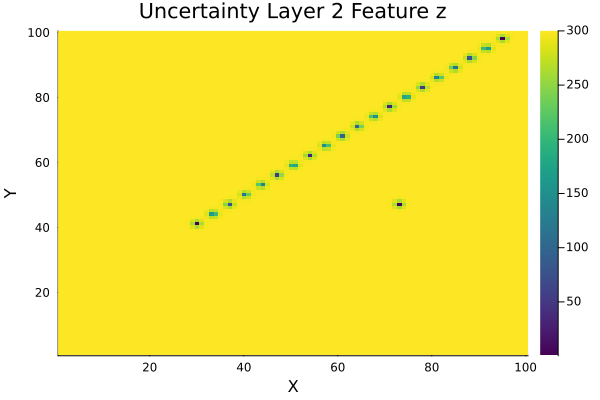

In [11]:
visualize_uncertainty(pomdp, 2, :z)

### Test: Points close are predicted with more accuracy and less uncertainty than points far.

In [8]:
gtlayer = pomdp.state.earth[1].gt

# seismic_line = (x1=0.0, y1=0.0, x2=5.0, y2=98.0)
well1 = Point(19, 34)
well2 = Point(30, 12)
well_close = Point(31, 14)
well_far = Point(98, 97)

all_wells = Multi([well1, well2])
data_at_all_wells = gtlayer[all_wells, :]

γ = SphericalVariogram(range=RANGE, sill=SILL, nugget=NUGGET)

okrig = GeoStatsModels.OrdinaryKriging(γ)
fitkrig = GeoStatsModels.fit(okrig, data_at_all_wells)

# We notice that prediction at close has much less variance than prediction at far, 
# and as an additional sanity check the prediction at close is close to the well2 point.
# Krigging predictprob only does one attribute at a time.

probs_far = GeoStatsModels.predictprob(fitkrig, :z, well_far)
probs_close = GeoStatsModels.predictprob(fitkrig, :z, well_close)
probs_close, probs_far

UndefVarError: UndefVarError: `pomdp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### Test: Uncertainty is low around known points.
Additionally, as nugget is increased uncertainty (both globally and at known points) increases.
Pay attention to colorbar when verifying this.

### Buy well data at 3-4 locations and visualize belief

In [10]:
buy_well_data(pomdp, 2)
buy_well_data(pomdp, 5)
buy_well_data(pomdp, 7)

UndefVarError: UndefVarError: `pomdp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [12]:
visualize_uncertainty(Multi([pomdp.collected_locs...]), 3, "z") # Note this is time consuming at just 3 gathered points.

UndefVarError: UndefVarError: `pomdp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [13]:
distr = observe(pomdp, Point(18, 24), 3, "z")
rand(distr)

UndefVarError: UndefVarError: `pomdp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.